<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Preparing the IMDB Movie Reviews Dataset

In [1]:
# Download IMDB to current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# Extract
!tar zxf aclImdb_v1.tar.gz
# Delete aclImdb/train/unsup because it is unlabeled
!rm -rf aclImdb/train/unsup
# Display description of IMDB dataset
!cat aclImdb/README

--2025-05-28 06:06:29--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.2’

aclImdb_v1.tar.gz.2 100%[===================>]  80.23M  29.2MB/s    in 2.7s    

2025-05-28 06:06:32 (29.2 MB/s) - ‘aclImdb_v1.tar.gz.2’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include 

####Load the files using scikit-learn's load_files.

In [2]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# Display the correspondence between labels 0,1 and meanings
print(train_review.target_names)

['neg', 'pos']


In [3]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


###BoW

In [4]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()

# Summarize into a DataFrame
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


###n-gram

In [6]:
# Specify the n-gram range to use with ngram_range
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


###[Problem 1] Scratch implementation of BoW
Please create a program that can calculate the BoW of the following three sentences without using scikit-learn. Calculate using 1-gram and 2-gram.

This movie is SOOOO funny!!!
What a movie! I never
best movie ever!!!!! this movie

In [7]:
import pandas as pd
import re
import numpy as np

sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

def tokenize(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

def create_ngram(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

def calculate_bow(sentences, ngram_range=(1, 1)):
    all_ngrams = []
    for sentence in sentences:
        tokens = tokenize(sentence)
        for n in range(ngram_range[0], ngram_range[1] + 1):
            all_ngrams.extend(create_ngram(tokens, n))

    # Get unique n-grams to form the vocabulary
    vocabulary = sorted(list(set(all_ngrams)))
    ngram_index = {ngram: i for i, ngram in enumerate(vocabulary)}

    # Create the BoW matrix
    bow_matrix = np.zeros((len(sentences), len(vocabulary)), dtype=int)
    for i, sentence in enumerate(sentences):
        tokens = tokenize(sentence)
        sentence_ngrams = []
        for n in range(ngram_range[0], ngram_range[1] + 1):
            sentence_ngrams.extend(create_ngram(tokens, n))

        for ngram in sentence_ngrams:
            if ngram in ngram_index:
                bow_matrix[i, ngram_index[ngram]] += 1

    return bow_matrix, vocabulary

# Calculate 1-gram BoW
bow_1gram, vocab_1gram = calculate_bow(sentences, ngram_range=(1, 1))
df_1gram = pd.DataFrame(bow_1gram, columns=vocab_1gram)
print("1-gram BoW:")
display(df_1gram)

# Calculate 2-gram BoW
bow_2gram, vocab_2gram = calculate_bow(sentences, ngram_range=(2, 2))
df_2gram = pd.DataFrame(bow_2gram, columns=vocab_2gram)
print("\n2-gram BoW:")
display(df_2gram)

1-gram BoW:


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0



2-gram BoW:


,a movie,best movie,ever this,i never,is soooo,movie ever,movie i,movie is,soooo funny,this movie,what a
0,0,0,0,0,1,0,0,1,1,1,0
1,1,0,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0,1,0,0,0,1,0


####IDF
The IDF is an index whose value increases the more rare a token is in a dataset.

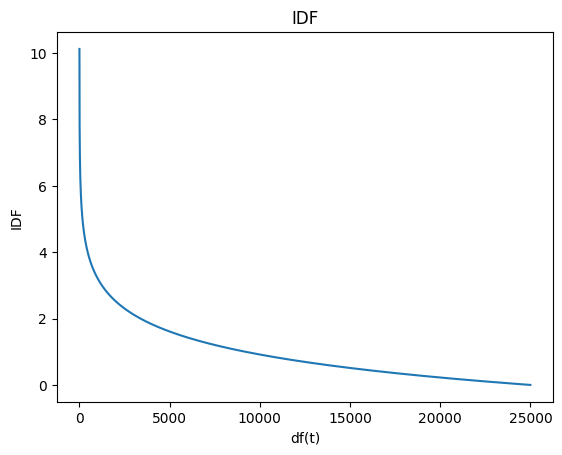

In [8]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

####Stop words

In [9]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [10]:
# Download stop words if you are using for the first time
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...


stop word : ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


###[Problem 2] Calculating TF-IDF

In [12]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure NLTK stopwords are downloaded
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

# Load NLTK stop words
stop_words = stopwords.words('english')

# Initialize TfidfVectorizer
# - max_features: sets the maximum vocabulary size
# - stop_words: uses the NLTK stop words
# - norm=None: as per the problem description, disables L2 normalization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words, norm=None)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(x_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)
print("Vocabulary size (actual):", len(tfidf_vectorizer.vocabulary_))

# we can inspect a few feature names
print("\nTop 20 feature names:")
print(tfidf_vectorizer.get_feature_names_out()[:20])

Shape of X_train_tfidf: (25000, 5000)
Shape of X_test_tfidf: (25000, 5000)
Vocabulary size (actual): 5000

Top 20 feature names:
['00' '000' '10' '100' '11' '12' '13' '13th' '14' '15' '16' '17' '18'
 '1930' '1930s' '1933' '1940' '1950' '1950s' '1960']


###[Problem 3] Learning using TF-IDF

In [13]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np # Import numpy for potential array operations if needed

# Ensure NLTK stopwords are downloaded
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

# Define a function to encapsulate the process for easy parameter testing
def train_and_evaluate_model(x_train, x_test, y_train, y_test, max_features, use_stopwords, ngram_range):
    print(f"\n--- Training with max_features={max_features}, use_stopwords={use_stopwords}, ngram_range={ngram_range} ---")

    stop_words_list = stopwords.words('english') if use_stopwords else None

    # Initialize TfidfVectorizer with specified parameters
    tfidf_vectorizer = TfidfVectorizer(
        max_features=max_features,
        stop_words=stop_words_list,
        ngram_range=ngram_range,
        norm=None # As specified in the previous problem
    )

    # Fit and transform the training data
    X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

    # Transform the test data
    X_test_tfidf = tfidf_vectorizer.transform(x_test)

    print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
    print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")
    print(f"Vocabulary size (actual): {len(tfidf_vectorizer.vocabulary_)}")

    # Initialize and train the Logistic Regression model
    model = LogisticRegression(max_iter=1000, solver='liblinear') # Increased max_iter for convergence
    model.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return accuracy

# --- Experimenting with different parameters ---

# Experiment 1: Baseline (around 5000 features, NLTK stopwords, unigrams)
train_and_evaluate_model(x_train, x_test, y_train, y_test, max_features=5000, use_stopwords=True, ngram_range=(1, 1))

# ---
# Experiment 2: Increased maximum vocabulary size
train_and_evaluate_model(x_train, x_test, y_train, y_test, max_features=10000, use_stopwords=True, ngram_range=(1, 1))

# ---
# Experiment 3: No NLTK stop words
train_and_evaluate_model(x_train, x_test, y_train, y_test, max_features=5000, use_stopwords=False, ngram_range=(1, 1))

# ---
# Experiment 4: Including bigrams (n-gram range (1, 2))
train_and_evaluate_model(x_train, x_test, y_train, y_test, max_features=5000, use_stopwords=True, ngram_range=(1, 2))

# ---
# Experiment 5: Increased vocabulary and bigrams
train_and_evaluate_model(x_train, x_test, y_train, y_test, max_features=10000, use_stopwords=True, ngram_range=(1, 2))

# ---
# Experiment 6: Try trigrams as well (n-gram range (1, 3))
train_and_evaluate_model(x_train, x_test, y_train, y_test, max_features=10000, use_stopwords=True, ngram_range=(1, 3))


--- Training with max_features=5000, use_stopwords=True, ngram_range=(1, 1) ---
Shape of X_train_tfidf: (25000, 5000)
Shape of X_test_tfidf: (25000, 5000)
Vocabulary size (actual): 5000
Accuracy: 0.8122
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81     12500
           1       0.82      0.81      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000


--- Training with max_features=10000, use_stopwords=True, ngram_range=(1, 1) ---
Shape of X_train_tfidf: (25000, 10000)
Shape of X_test_tfidf: (25000, 10000)
Vocabulary size (actual): 10000
Accuracy: 0.8274
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83     12500
           1       0.84      0.81      0.82     12500

    accuracy                           0.83     2

0.83692

####Observations
- Changing max_features affects the number of features used. A lower max_features might lose important terms, while a very high one might include noisy terms.
- Removing stop words tends to increase the vocabulary size as common words are included. This might or might not improve performance depending on the classifier and dataset.
- Using higher n-grams (like 2-gram or 3-gram) captures word phrases, which can provide more context than single words. This often increases the feature space significantly, requiring more memory and potentially affecting training time.
- Different classifiers (Multinomial Naive Bayes, Logistic Regression, Linear SVC) perform differently based on the feature representation and their underlying assumptions.

###[Problem 4] Scratch implementation of TF-IDF


In [14]:
import math
from collections import defaultdict

sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

def tokenize(text):
    """Simple tokenization: convert to lowercase and split by non-alphanumeric characters."""
    return [word for word in text.lower().split() if word.isalpha()] # Only keep alphabetic words

def calculate_tf_idf(sentences, formula_type="standard"):
    """
    Calculates TF-IDF for the given sentences using either the standard or scikit-learn formula.
    Normalization is not applied.
    """
    tokenized_documents = [tokenize(s) for s in sentences]
    num_documents = len(sentences)

    # 1. Calculate Document Frequency (df) for IDF
    # df[term] = count of documents containing 'term'
    doc_freq = defaultdict(int)
    for doc in tokenized_documents:
        unique_terms_in_doc = set(doc)
        for term in unique_terms_in_doc:
            doc_freq[term] += 1

    # Store all unique terms for consistent ordering in output
    all_unique_terms = sorted(list(doc_freq.keys()))

    tf_idf_vectors = []

    for i, doc_tokens in enumerate(tokenized_documents):
        # Calculate Term Frequency (TF) for the current document
        term_counts = defaultdict(int)
        for term in doc_tokens:
            term_counts[term] += 1

        current_tf_idf_vector = {}

        for term in all_unique_terms:
            tf = 0
            idf = 0

            if formula_type == "standard":
                # Standard TF
                if term in term_counts:
                    tf = term_counts[term] / len(doc_tokens)
                # Standard IDF
                idf = math.log(num_documents / doc_freq[term])
            elif formula_type == "sklearn":
                # Scikit-learn TF
                tf = term_counts[term] # n_t_d is simply the count
                # Scikit-learn IDF
                idf = math.log((1 + num_documents) / (1 + doc_freq[term])) + 1
            else:
                raise ValueError("formula_type must be 'standard' or 'sklearn'")

            current_tf_idf_vector[term] = tf * idf
        tf_idf_vectors.append(current_tf_idf_vector)

    return tf_idf_vectors, all_unique_terms

# --- Calculate and print Standard TF-IDF ---
print("--- Standard TF-IDF ---")
standard_tf_idf_vectors, standard_terms = calculate_tf_idf(sentences, formula_type="standard")

# Print header
header = ["Document"] + standard_terms
print("{:<10}".format(header[0]), end="")
for term in header[1:]:
    print("{:<10}".format(term), end="")
print()

# Print values
for i, vector_dict in enumerate(standard_tf_idf_vectors):
    print(f"{'Doc ' + str(i+1):<10}", end="")
    for term in standard_terms:
        print(f"{vector_dict.get(term, 0.0):<10.4f}", end="")
    print()

# --- Calculate and print Scikit-learn TF-IDF ---
print("\n--- Scikit-learn TF-IDF ---")
sklearn_tf_idf_vectors, sklearn_terms = calculate_tf_idf(sentences, formula_type="sklearn")

# Print header (should be same as standard terms)
header = ["Document"] + sklearn_terms
print("{:<10}".format(header[0]), end="")
for term in header[1:]:
    print("{:<10}".format(term), end="")
print()

# Print values
for i, vector_dict in enumerate(sklearn_tf_idf_vectors):
    print(f"{'Doc ' + str(i+1):<10}", end="")
    for term in sklearn_terms:
        print(f"{vector_dict.get(term, 0.0):<10.4f}", end="")
    print()

--- Standard TF-IDF ---
Document  a         best      i         is        movie     never     soooo     this      what      
Doc 1     0.0000    0.0000    0.0000    0.2747    0.1014    0.0000    0.2747    0.1014    0.0000    
Doc 2     0.2747    0.0000    0.2747    0.0000    0.0000    0.2747    0.0000    0.0000    0.2747    
Doc 3     0.0000    0.2747    0.0000    0.0000    0.2027    0.0000    0.0000    0.1014    0.0000    

--- Scikit-learn TF-IDF ---
Document  a         best      i         is        movie     never     soooo     this      what      
Doc 1     0.0000    0.0000    0.0000    1.6931    1.2877    0.0000    1.6931    1.2877    0.0000    
Doc 2     1.6931    0.0000    1.6931    0.0000    0.0000    1.6931    0.0000    0.0000    1.6931    
Doc 3     0.0000    1.6931    0.0000    0.0000    2.5754    0.0000    0.0000    1.2877    0.0000    


####How to use Word2Vec

In [15]:
# !pip install numpy==1.26.4 scipy==1.10.1 gensim==4.3.3

In [16]:
from gensim.models import Word2Vec

sentences = [
    ['this', 'movie', 'is', 'very', 'good'],
    ['this', 'film', 'is', 'a', 'good'],
    ['very', 'bad', 'very', 'very', 'bad']
]

# Use `vector_size` instead of `size`
model = Word2Vec(sentences, min_count=1, vector_size=10, epochs=10)

# Print vocabulary
print("Vocabulary list:", list(model.wv.index_to_key))

# Print vectors
for vocab in model.wv.index_to_key:
    print(f"Vector of {vocab}:\n{model.wv[vocab]}")


Vocabulary list: ['very', 'bad', 'is', 'good', 'this', 'a', 'film', 'movie']
Vector of very:
[-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
Vector of bad:
[ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
Vector of is:
[ 0.07312167  0.0507054   0.06758064  0.00762907  0.06351239 -0.03405553
 -0.00946453  0.0576889  -0.0752205  -0.0393632 ]
Vector of good:
[-0.07511159 -0.0092933   0.09539524 -0.07320156 -0.02333103 -0.0193821
  0.08077823 -0.05930063  0.00043841 -0.04754505]
Vector of this:
[-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
Vector of a:
[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
Vector of film:
[-0.01578478  0.0032073  -0.04143126 -0.07683634 -0.01509068  0.02470904
 -0.008

###[Problem 5] Corpus preprocessing


In [17]:
def preprocess_text(text):
  """
    Performs preprocessing on a single text string.

    Steps:
    1. Remove URLs.
    2. Remove special characters and punctuation.
    3. Convert to lowercase.
    4. Split into tokens.
    5. Remove stop words.

    Args:
      text (str): The input text string.

    Returns:
      list: A list of cleaned tokens.
  """
  # Remove URLs
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

  # Remove special characters and punctuation, keep spaces and letters/numbers
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  # Convert to lowercase
  text = text.lower()

  # Split into tokens (words)
  tokens = text.split()

  # Remove stop words
  # Ensure stopwords are downloaded
  try:
    nltk.data.find('corpora/stopwords')
  except nltk.downloader.DownloadError:
    nltk.download('stopwords')
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  return tokens

# Apply preprocessing to the training and test data
x_train_processed = [preprocess_text(text) for text in x_train]
x_test_processed = [preprocess_text(text) for text in x_test]

# Print the first processed training review as an example
print("Original training review (first):")
print(x_train[0])
print("\nProcessed training review (first):")
x_train_processed[0]

Original training review (first):
Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.

Processed training review (first):


['zero',
 'day',
 'leads',
 'think',
 'even',
 'rethink',
 'two',
 'boysyoung',
 'men',
 'would',
 'commit',
 'mutual',
 'suicide',
 'via',
 'slaughtering',
 'classmates',
 'captures',
 'must',
 'beyond',
 'bizarre',
 'mode',
 'two',
 'humans',
 'decided',
 'withdraw',
 'common',
 'civility',
 'order',
 'define',
 'ownmutual',
 'world',
 'via',
 'coupled',
 'destructionbr',
 'br',
 'perfect',
 'movie',
 'given',
 'moneytime',
 'filmmaker',
 'actors',
 'remarkable',
 'product',
 'terms',
 'explaining',
 'motives',
 'actions',
 'two',
 'young',
 'suicidemurderers',
 'better',
 'elephant',
 'terms',
 'film',
 'gets',
 'rationalistic',
 'skin',
 'far',
 'far',
 'better',
 'film',
 'almost',
 'anything',
 'likely',
 'see',
 'br',
 'br',
 'flawed',
 'honest',
 'terrible',
 'honesty']

###[Problem 6] Learning Word2Vec
Please train Word2Vec.

In [18]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import re

# Ensure NLTK resources are downloaded
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')


# Combine training and testing data for comprehensive vocabulary
all_reviews = list(x_train) + list(x_test)

# --- Text Preprocessing for Word2Vec ---
# This is a simple tokenizer. For more advanced use cases, consider spaCy or NLTK's word_tokenize.
def preprocess_text_for_word2vec(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers, keep only alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize by splitting on whitespace
    tokens = text.split()
    return tokens

print("Starting preprocessing of IMDB reviews...")
processed_sentences = [preprocess_text_for_word2vec(review) for review in all_reviews]
print(f"Finished preprocessing. Sample of first processed review: {processed_sentences[0][:20]}...")

print("\nTraining Word2Vec model...")
word2vec_model = Word2Vec(
    sentences=processed_sentences,
    vector_size=100,  # Example: 100-dimensional word vectors
    window=5,         # Example: Context window of 5 words on either side
    min_count=5,      # Example: Ignore words that appear less than 5 times
    sg=1,             # Use Skip-gram (sg=1) over CBOW (sg=0)
    workers=4         # Use 4 CPU cores if available
)

print("\nWord2Vec model training complete.")
print(f"Number of words in vocabulary: {len(word2vec_model.wv)}")

# --- Explore the trained model ---

# Get the vector for a specific word
word_vector = word2vec_model.wv['movie']
print(f"\nVector for 'movie' (first 10 dimensions): {word_vector[:10]}")

# Find most similar words
print("\nWords most similar to 'movie':")
for word, similarity in word2vec_model.wv.most_similar('movie'):
    print(f"  {word}: {similarity:.4f}")

print("\nWords most similar to 'great':")
for word, similarity in word2vec_model.wv.most_similar('great'):
    print(f"  {word}: {similarity:.4f}")

print("\nWords most similar to 'terrible':")
for word, similarity in word2vec_model.wv.most_similar('terrible'):
    print(f"  {word}: {similarity:.4f}")

# Perform a word analogy (e.g., king - man + woman = queen)
# Note: Word analogies can be sensitive to the training data and parameters
try:
    print("\n'man' - 'woman' + 'king' = ?")
    result = word2vec_model.wv.most_similar(positive=['king', 'woman'], negative=['man'])
    for word, similarity in result:
        print(f"  {word}: {similarity:.4f}")
except KeyError:
    print("One or more words for analogy not found in vocabulary with current min_count.")

Starting preprocessing of IMDB reviews...
Finished preprocessing. Sample of first processed review: ['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 'rethink', 'why', 'two', 'boysyoung', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide']...

Training Word2Vec model...

Word2Vec model training complete.
Number of words in vocabulary: 44869

Vector for 'movie' (first 10 dimensions): [ 0.20088194 -0.1654336   0.24017312  0.1422975   0.0516918   0.08014474
  0.2421351   0.38264176 -0.1597758  -0.2254651 ]

Words most similar to 'movie':
  film: 0.9105
  movieand: 0.8485
  movieit: 0.8216
  filmit: 0.8195
  moviebr: 0.8107
  moviebut: 0.7949
  flick: 0.7914
  filmwhich: 0.7633
  moviei: 0.7622
  filmbut: 0.7594

Words most similar to 'great':
  wonderful: 0.8482
  terrific: 0.8382
  fantastic: 0.8112
  fine: 0.7988
  good: 0.7798
  superb: 0.7616
  marvellous: 0.7613
  brilliant: 0.7537
  marvelous: 0.7514
  phenomenal: 0.7474

Words most similar to 'terrible'

###[Problem 7] (Advanced) Vector visualization
Visualize the resulting vectors using t-SNE, and pick some words to wv.most_similarfind similar words using


Applying t-SNE to 500 word vectors...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE complete.


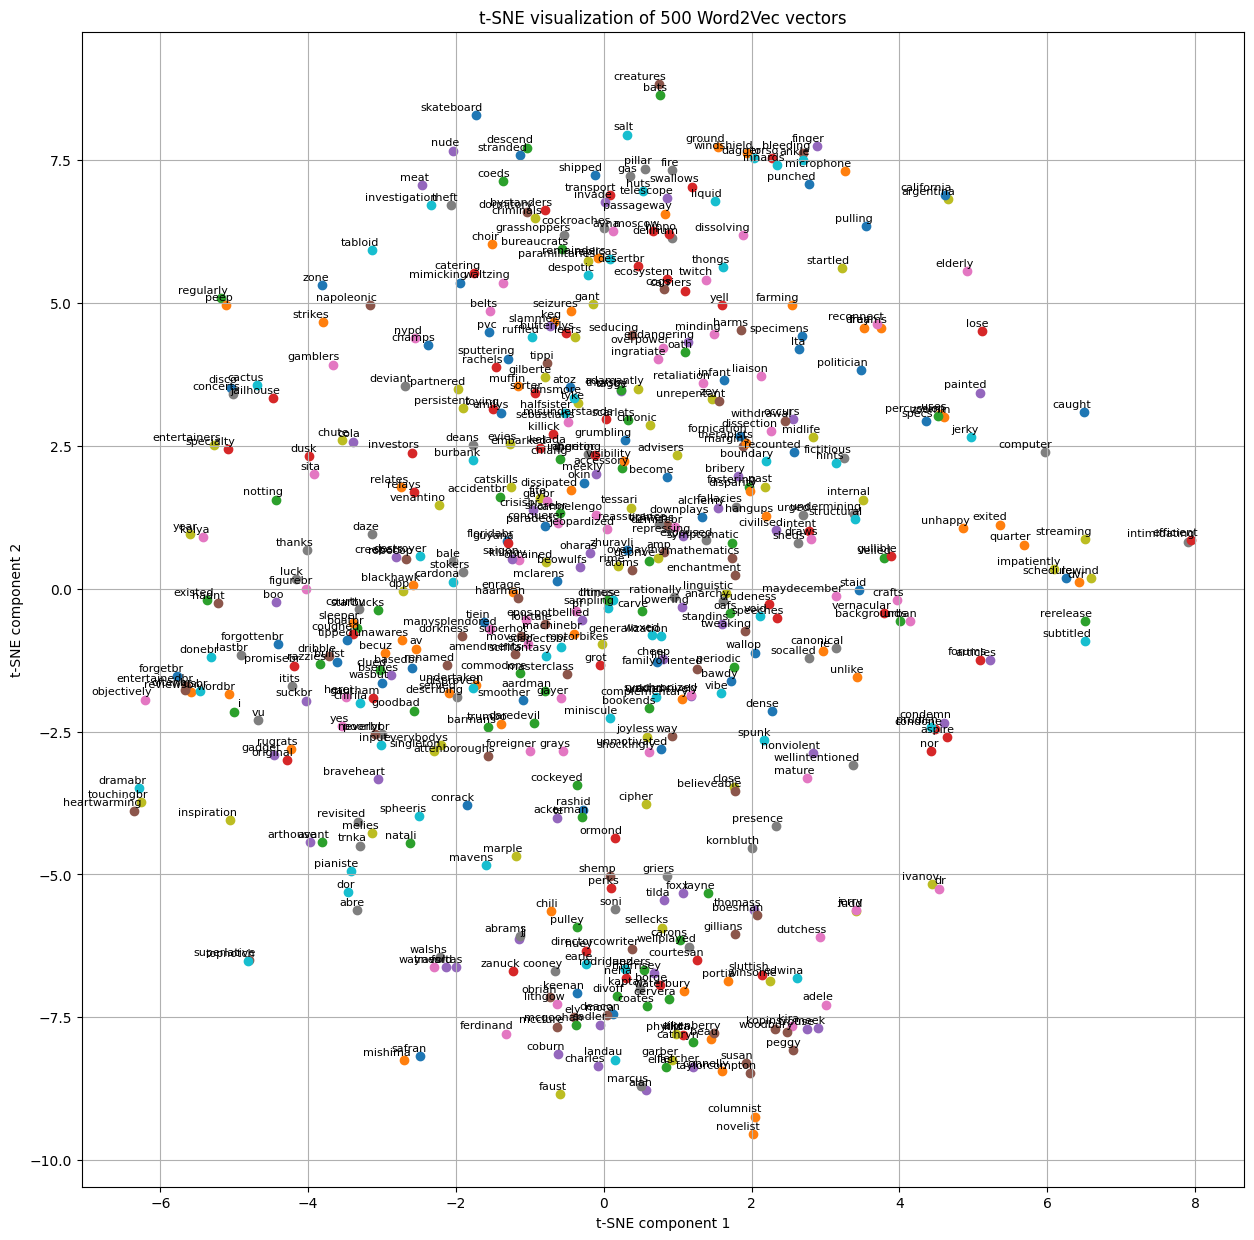


--- Exploring Similar Words ---

Words most similar to 'good':
  decent: 0.8144
  great: 0.7798
  bad: 0.7676
  serviceable: 0.7181
  fine: 0.7170
  nice: 0.7169
  goodand: 0.7131
  soso: 0.7116
  halfbad: 0.7082
  helluva: 0.6984

Words most similar to 'bad':
  terrible: 0.8024
  horrible: 0.7814
  awful: 0.7692
  good: 0.7676
  lousy: 0.7453
  badi: 0.7439
  shitty: 0.7337
  badbr: 0.7257
  stupid: 0.7229
  terriblethe: 0.7222

Words most similar to 'action':
  wellchoreographed: 0.7128
  swordplay: 0.7098
  shootemup: 0.6971
  shootouts: 0.6849
  gunfights: 0.6797
  handtohand: 0.6775
  martialarts: 0.6767
  gunfighting: 0.6742
  kungfu: 0.6739
  fastpaced: 0.6721

Words most similar to 'comedy':
  farce: 0.8313
  screwball: 0.8165
  slapstick: 0.8030
  satire: 0.7667
  frothy: 0.7556
  humour: 0.7491
  situational: 0.7444
  comedic: 0.7296
  humor: 0.7251
  drama: 0.7190

Words most similar to 'director':
  writerdirector: 0.8156
  filmmaker: 0.8114
  screenwriter: 0.8084
  writer

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

# --- Select words for visualization ---
# Get the list of all words in the vocabulary
words = list(word2vec_model.wv.index_to_key)

# Select a subset of words for visualization.
# Choosing too many can make the plot cluttered and t-SNE computation slow.
# select important words, or a random sample.
num_words_to_visualize = 500 # Adjust as needed
if len(words) > num_words_to_visualize:
    words_subset = random.sample(words, num_words_to_visualize)
else:
    words_subset = words

# Get the vectors for the selected words
vectors_subset = word2vec_model.wv[words_subset]

# --- Apply t-SNE for dimensionality reduction ---
# t-SNE reduces the high-dimensional vectors to 2 dimensions for plotting.
# The perplexity parameter is sensitive; typical values are between 5 and 50.
print(f"\nApplying t-SNE to {len(words_subset)} word vectors...")
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
vectors_2d = tsne_model.fit_transform(vectors_subset)
print("t-SNE complete.")

# --- Visualize the vectors ---
plt.figure(figsize=(15, 15))
for i, word in enumerate(words_subset):
    x, y = vectors_2d[i, :]
    plt.scatter(x, y)
    # Annotate the points with the word text
    plt.annotate(word,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 fontsize=8)

plt.title(f't-SNE visualization of {len(words_subset)} Word2Vec vectors')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.grid(True)
plt.show()

# --- Find similar words using wv.most_similar ---
print("\n--- Exploring Similar Words ---")

# Choose a few interesting words from the vocabulary to find similar words
sample_words_for_similarity = ['good', 'bad', 'action', 'comedy', 'director', 'actor']

for word in sample_words_for_similarity:
    if word in word2vec_model.wv.index_to_key:
        print(f"\nWords most similar to '{word}':")
        try:
            similar_words = word2vec_model.wv.most_similar(word)
            for similar_word, similarity in similar_words:
                print(f"  {similar_word}: {similarity:.4f}")
        except KeyError:
             print(f"  '{word}' not found in vocabulary with current min_count.")

    else:
        print(f"\n'{word}' not found in the vocabulary.")

###[Problem 8] (Advanced Task) Movie review classification using Word2Vec
Use the vectors obtained in Problem 6 or publicly available trained vectors to train and estimate sentiment classification for the IMDB movie review dataset.

In [20]:
import numpy as np
# --- Feature Engineering: Representing Documents with Word Embeddings ---

# We need to convert each processed review (list of tokens) into a fixed-size vector.
# A common approach is to average the vectors of the words in the review.

def document_vector(word2vec_model, doc_tokens):
    """
    Computes the average vector for a document given its tokens and a Word2Vec model.
    Ignores words not present in the model's vocabulary.
    """
    # Get vectors for words in the document that are in the vocabulary
    word_vectors = [word2vec_model.wv[token] for token in doc_tokens if token in word2vec_model.wv]

    if not word_vectors:
        # Return a zero vector of the correct size if no words are in the vocabulary
        return np.zeros(word2vec_model.wv.vector_size)
    else:
        # Average the word vectors
        return np.mean(word_vectors, axis=0)

# Convert training and testing reviews into document vectors
print("\nConverting training reviews to document vectors...")
X_train_vec = np.array([document_vector(word2vec_model, doc) for doc in x_train_processed])
print(f"Shape of X_train_vec: {X_train_vec.shape}")

print("Converting testing reviews to document vectors...")
X_test_vec = np.array([document_vector(word2vec_model, doc) for doc in x_test_processed])
print(f"Shape of X_test_vec: {X_test_vec.shape}")

# --- Classification using Document Vectors ---

# We can use the same Logistic Regression model as before, but trained on the
# document vectors instead of TF-IDF features.

print("\nTraining Logistic Regression model on Word2Vec document vectors...")
# Initialize and train the Logistic Regression model
# Note: Word2Vec vectors are dense, standard solvers like 'lbfgs' or 'adam' might be preferred
# compared to 'liblinear' which is good for sparse data.
model_w2v = LogisticRegression(max_iter=1000, solver='lbfgs')
model_w2v.fit(X_train_vec, y_train)
print("Model training complete.")

# Make predictions
y_pred_w2v = model_w2v.predict(X_test_vec)

# Evaluate the model
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)
print(f"\nAccuracy (Word2Vec + Logistic Regression): {accuracy_w2v:.4f}")
print("Classification Report (Word2Vec + Logistic Regression):\n", classification_report(y_test, y_pred_w2v))




Converting training reviews to document vectors...
Shape of X_train_vec: (25000, 100)
Converting testing reviews to document vectors...
Shape of X_test_vec: (25000, 100)

Training Logistic Regression model on Word2Vec document vectors...
Model training complete.

Accuracy (Word2Vec + Logistic Regression): 0.8686
Classification Report (Word2Vec + Logistic Regression):
               precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



##### Discussion
- Compare the accuracy of the Word2Vec approach to the TF-IDF approach.
  
  - Word2Vec often captures semantic relationships better than TF-IDF, but averaging word vectors loses the word order information. More sophisticated methods like using RNNs or LSTMs with Word2Vec embeddings can utilize sequence information for potentially better results, but are more complex to implement.
  - The performance also heavily depends on the quality of the Word2Vec model (trained on enough data, appropriate parameters).